![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

Imports

In [12]:
# Start your code here!

import pandas as pd
import matplotlib.pyplot as plt
import pingouin
from scipy.stats import mannwhitneyu


Load and filter datasets

In [13]:
# Load men's and women's datasets
men = pd.read_csv("men_results.csv")
women = pd.read_csv("women_results.csv")

# Filter data for the time range and tournament
men["date"] = pd.to_datetime(men["date"])
men_subset = men[(men["date"] > "2002-01-01") & (men["tournament"].isin(["FIFA World Cup"]))]

women["date"] = pd.to_datetime(women["date"])
women_subset = women[(women["date"] > "2002-01-01") & (women["tournament"].isin(["FIFA World Cup"]))]


Create group and goals_scored columns

In [14]:
# Create group and goals_scored columns
men_subset["group"] = "men"
women_subset["group"] = "women"

men_subset["goals_scored"] = men_subset["home_score"] + men_subset["away_score"]
women_subset["goals_scored"] = women_subset["home_score"] + women_subset["away_score"]


Check normality using histograms

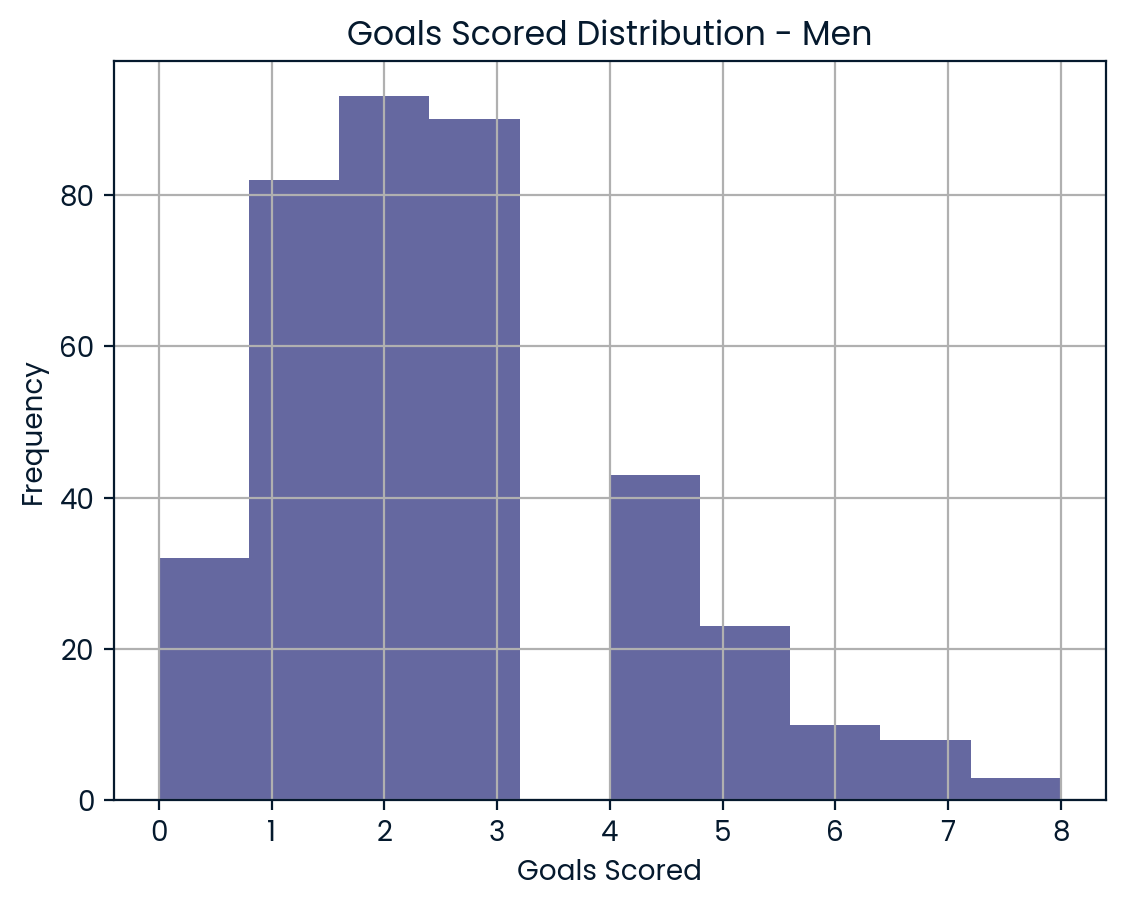

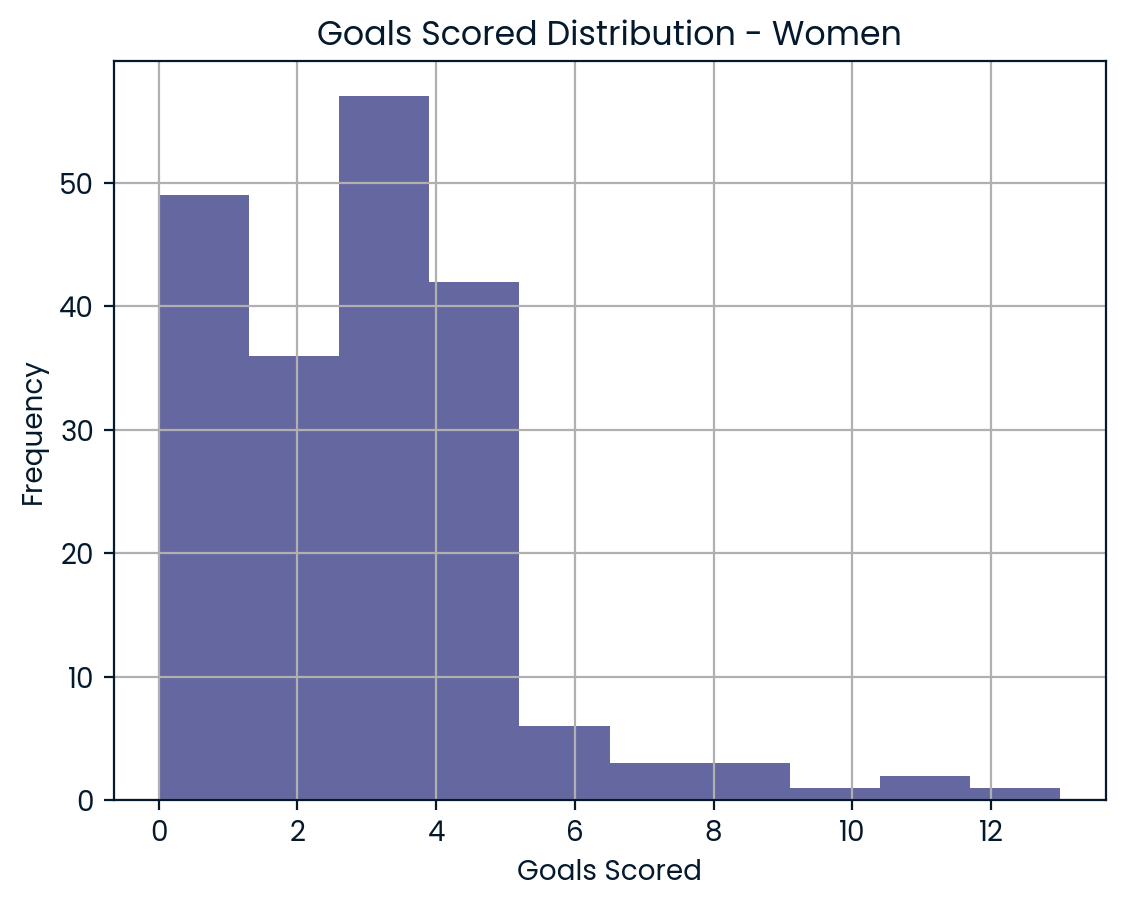

<Figure size 640x480 with 0 Axes>

In [15]:
# Determine normality using histograms
men_subset["goals_scored"].hist()
plt.title("Goals Scored Distribution - Men")
plt.xlabel("Goals Scored")
plt.ylabel("Frequency")
plt.show()
plt.clf()

women_subset["goals_scored"].hist()
plt.title("Goals Scored Distribution - Women")
plt.xlabel("Goals Scored")
plt.ylabel("Frequency")
plt.show()
plt.clf()


Check normality using histograms

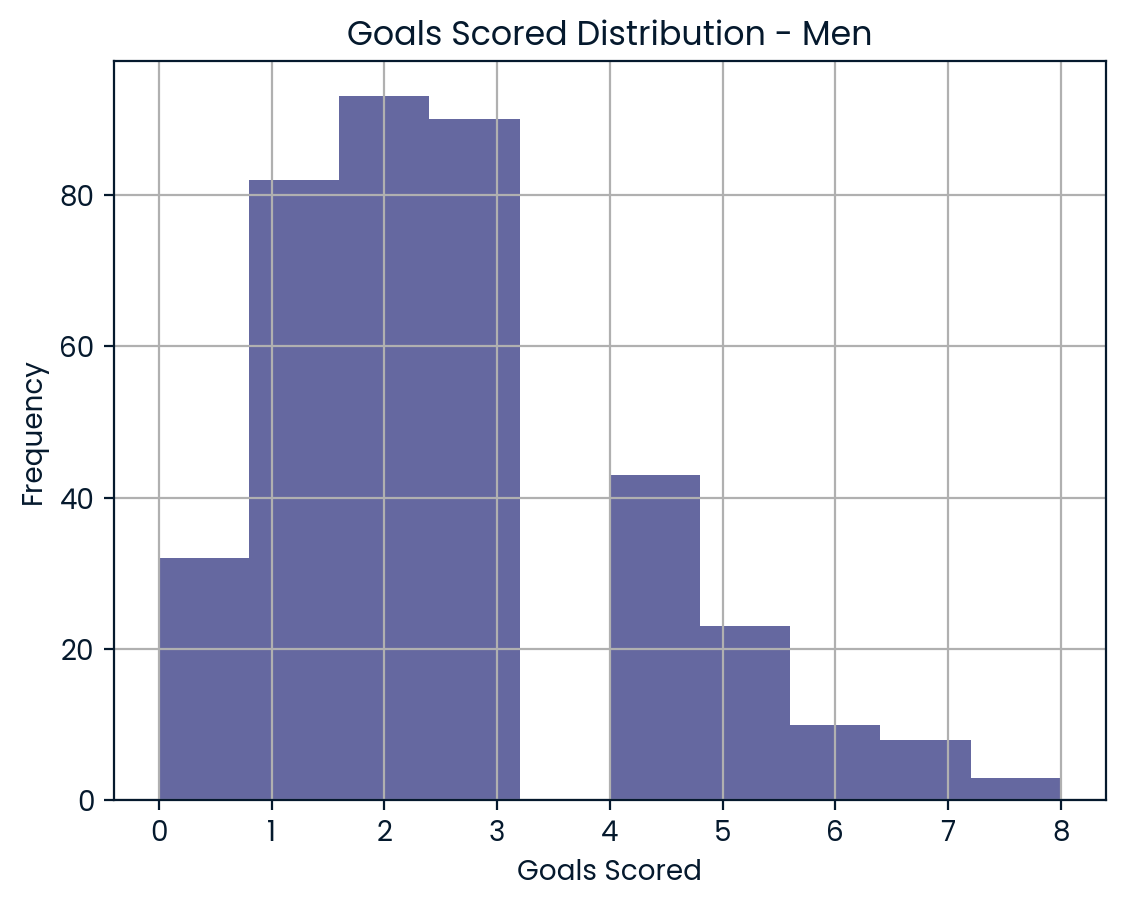

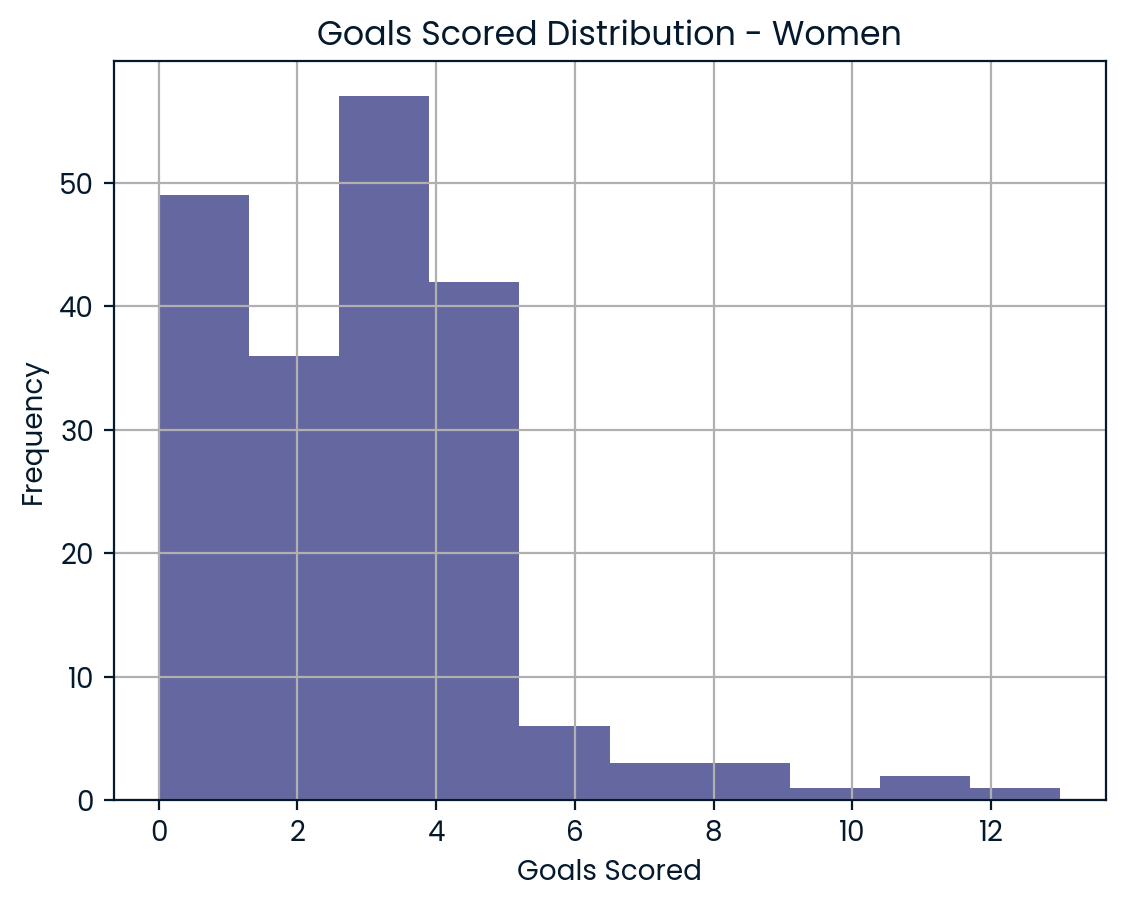

<Figure size 640x480 with 0 Axes>

In [16]:
# Determine normality using histograms
men_subset["goals_scored"].hist()
plt.title("Goals Scored Distribution - Men")
plt.xlabel("Goals Scored")
plt.ylabel("Frequency")
plt.show()
plt.clf()

women_subset["goals_scored"].hist()
plt.title("Goals Scored Distribution - Women")
plt.xlabel("Goals Scored")
plt.ylabel("Frequency")
plt.show()
plt.clf()


Combine and reshape data for testing

In [17]:
# Combine women's and men's data and calculate goals scored in each match
both = pd.concat([women_subset, men_subset], axis=0, ignore_index=True)

# Transform the data for the pingouin Mann-Whitney U test
both_subset = both[["goals_scored", "group"]]
both_subset_wide = both_subset.pivot(columns="group", values="goals_scored")


Perform Wilcoxon-Mann-Whitney test

In [18]:
# Perform right-tailed Wilcoxon-Mann-Whitney test with pingouin
results_pg = pingouin.mwu(x=both_subset_wide["women"],
                          y=both_subset_wide["men"],
                          alternative="greater")

# Alternative SciPy solution for validation
results_scipy = mannwhitneyu(x=women_subset["goals_scored"],
                             y=men_subset["goals_scored"],
                             alternative="greater")


Extract p-value and interpret results

In [19]:
# Extract p-value as a float
p_val = results_pg["p-val"].values[0]

# Determine hypothesis test result using significance level (α = 0.01)
if p_val <= 0.01:
    result = "reject"
else:
    result = "fail to reject"

result_dict = {"p_val": p_val, "result": result}
result_dict


{'p_val': 0.005106609825443641, 'result': 'reject'}